# 1.- Regresión Lineal Ordinaria (LSS)

En esta sección trabajaremos con un dataset conocido como House Sales in King County, USA, presentado
en la plataforma de Kaggle [4], el cual es un gran dataset para evaluar simples modelos de regresión. Los
registros contienen distintas características asociadas a las ventas de casas en la localidad King County, entre
mayo de 2014 y mayo de 2015, las cuales vienen descritas en el dataset, como la cantidad de habitaciones,
cantidad de baños, número de pisos, etc. Donde una de las variables a estudiar corresponde al precio en el
cual se vendió la casa.

  **a)** Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó.
Explique por qué se realiza la línea 4.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


La línea 4 se encarga de eliminar parámetros que no son importantes para la valoración de la vivienda. La función drop toma un arreglo de atributos y los elimina del dataset.

**b)** Describa brevemente el dataset a utilizar.

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Como se mustra en la salida anterior, el dataset corresponde a la información de 21613 casas, en donde cada una tiene 18 atributos asociados. Estos atributos corresponden a precio, número de baños, número de dormitorios, superficie del living, superficie total del terreno, número de pisos, entre otros más especificados en las columnas. Además, se presentan la media, la desviaciñon estándar y los cuartiles de cada atributo sobre el dataset total.

**c)** Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir.
Explique la importancia/conveniencia de realizar estas dos operaciones.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

La normalización es necesaria debido a que la mayoría de los algoritmos clasificadores hacen uso de la distancia euclidiana para calcular la distancia entre dos puntos en el dataset. Cuando existe un atributo con un rango de valores mucho mayor en comparación a los demás, este gobernará el calculo de la distancia. Esto puede producir, por ejemplo, que el algoritmo de gradiente (SGD) converja mucho más lento en comparación a una instancia normalizada.

La transformación sobre el precio, por otro lado, es necesaria para utilizar regresión lineal. Las regresiones lineales, tal y como dice su nombre, modelan utilizando rectas. Estas rectas luego son comparadas con los valores del precio para probar que tan bien se ajustan a nuestros valores. No tiene sentido realizar esta comapracion si el precio no sigue una tendencia lineal. Por ejemplo, se estaría intentando ajustar una recta sobre una función cuadratica, lo cual no es correcto. Al aplicar el logaritmo, nos aseguramos que el precio, nuestro ** y **, sea siempre lineal.

**d)** Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del
paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.

In [4]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

En el paso 4, se incorpora una columna de unos para representar a la constante $\beta_0$ en el modelo de la regresión lineal, que corresponde a nuestro intercepto. Esta constante proviene de la expresión:

$H = \beta^TX + \beta_0$

en donde $\beta$ es la matriz de los valores libres asociados con cada atributo en la matriz $X$ y $H$ es la estimación actual.

Los parámetros que se deben entregar a la función de regresión lineal, es la matriz de atributos $X$ y el vector de los valores verdaderos $Y$.

**e)** Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Qué variables
están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo
que observa y cuál puede ser la causa?

Los coeficientes corresponden a:

In [5]:
# Obtención de los coeficientes
betas = linreg.coef_
col = list(X)
bT = pd.DataFrame([betas], columns=col)
bT

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.010467,0.060495,-6.859566e+11,0.022173,0.038332,0.033358,0.041997,0.045268,0.186109,6.184769e+11,3.305463e+11,-0.109915,0.014885,0.186246,-0.004177,0.086068,-0.007039,13.039865


Los z-scores de los coeficientes corresponde a:

In [6]:
# Obtención de los z-score
from scipy import stats
zscores = stats.zscore(betas)
zT = pd.DataFrame([zscores], columns=col)
zT

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.063335,-0.063335,-3.035989,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,2.616891,1.369118,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335,-0.063335


Lo anterior se puede resumir en la siguiente tabla:

In [7]:
table = bT.append(zT).transpose()
table.columns = ["Coeficiente", "Z-Score"]
table

,Coeficiente,Z-Score
bedrooms,-1.046667e-02,-0.063335
bathrooms,6.049522e-02,-0.063335
sqft_living,-6.859566e+11,-3.035989
sqft_lot,2.217348e-02,-0.063335
floors,3.833246e-02,-0.063335
waterfront,3.335751e-02,-0.063335
view,4.199670e-02,-0.063335
condition,4.526842e-02,-0.063335
grade,1.861090e-01,-0.063335
sqft_above,6.184769e+11,2.616891


Usando un nivel de significancia de $5\%$, tenemos que son relevantes aquellos atributos cuyo $|z|$ sea mayor a las colas de la distribución $\mathcal{N}(\mu, \sigma)$ donde $\mu$ la media de los betas y $\sigma$ la desviación estándar. Como queremos un intervalo de confianza cerrado de igual magnitud, el problema se traduce a calcular:

$2P(Z \leq z) = 0.05$

Tal y como se explica en el libro guía, se puede testear utilizando la distribución $t_{(N - p - 1)}$ donde $N$ es la cantidad de datos utilizados y $p$ la cantidad de atributos, debido a la marginalidad de la diferencia entre la distribución normal y dicha distribución.

Obtenemos entonces:

In [8]:
stats.t.ppf([1-0.025], len(Xtrain)-len(col)-1)

array([ 1.960121])

Lo cual indica que son relevantes aquellas variables con z-score $|z| > 1.96$. Esto es, las variables sqft_living y sqft_above.

Se puede observar que de todos los atributos existentes, la mayoría tiene z-scores marginales en comparaciñon a los atributos sqft_living, sqft_above y sqft_basement, por lo que su aporte es también marginal en la predicción del precio de la vivienda.

**f)** Proponga un método para corregir lo observado (Hint: inspírese en los métodos de feature engineering
de las siguiente secciones). Verifíquelo mediante los Z-score presentados en la pregunta **e)**.

Basandonos en la sección anterior, podemos eliminar todos los atributos con z-score irrelevantes para la regresión lineal. Si consideramos a $z \rel 0.1$ como el umbral de selección, tenemos como resultado:

In [9]:
import sklearn.linear_model as lm
X2 = df_scaled.iloc[:, 1:]
X2 = X2.iloc[:,[2, 9, 10]] #use .ix instead, in older pandas version
print(list(X2))
N = X2.shape[0]
X2.insert(X2.shape[1], 'intercept', np.ones(N))
y2 = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X2))
limit = int(len(X2)*0.7)
mascara[:limit] = 1
istrain2 = mascara== 1
Xtrain2 = X2[istrain2]
ytrain2 = y2[istrain2]
Xtest2 = X2[np.logical_not(istrain2)]
ytest2 = y2[np.logical_not(istrain2)]
linreg2 = lm.LinearRegression(fit_intercept = False)
linreg2.fit(Xtrain2, ytrain2)
betas2 = linreg2.coef_
col2 = list(X2)
pd.DataFrame([betas2], columns=col2)
zscores2 = stats.zscore(betas2)
pd.DataFrame([zscores2], columns=col2)

['sqft_living', 'sqft_above', 'sqft_basement']


,sqft_living,sqft_above,sqft_basement,intercept
0,-1.546571,1.137128,0.544749,-0.135306


Considerando la distribución $t_{(N - k - 1)}$ donde $k$ son los atributos filtrados. Tenemos entonces:

In [10]:
stats.t.ppf([1-0.025], len(Xtrain2)-len(col2)-1)

array([ 1.96012085])

Esto implica que los atributos seleccionados son similarmente importantes en la predicción del precio.

**g)** Estime el error de predicción del modelo usando validación cruzada con un número de folds igual a K
= 5 y K = 10. Recuerde que para que la estimación sea razonable, en cada configuración (fold) deberá
reajustar los pesos del modelo. Mida el error real del modelo sobre el conjunto de pruebas, compare y
concluya.

Asumiendo que se debe utilizar el modelo con la selección de atributos seleccionada anteriormente, se tiene:

In [11]:
# Using the test sample conaining only selected predictors
yhat_test = linreg.predict(Xtest) # Predict 
mse_test = np.mean(np.power(yhat_test - ytest, 2))

# Form the matrix from the RAW set
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn.model_selection import KFold

def doKFold(Xt, yt, K):
    # Using K = 5
    kf = KFold(n_splits=K)
    mse_cv = 0
    for train_indeces, test_indeces in kf.split(Xm):
        # Select only the most relevant attributes
        # In the previous section we chose attributes with index 2, 9 and 10
        # as the most relevant.
        Xtrain_k = Xtrain.iloc[train_indeces].as_matrix()
        Xtest_k = Xtrain.iloc[test_indeces].as_matrix()
        ytrain_k = ytrain.iloc[train_indeces].as_matrix()
        ytest_k = ytrain.iloc[test_indeces].as_matrix()

        # Perform linear regression for this fold
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(Xtrain_k, ytrain_k)

        # Get the yhat for our test set
        yhat_val = linreg.predict(Xtest_k)

        # Calculate the MSE for the error
        mse_fold = np.mean(np.power(yhat_val - ytest_k, 2))
        mse_cv += mse_fold
    mse_cv = mse_cv / K
    return mse_cv


{"mse5": doKFold(Xtrain, ytrain, 5), "mse10": doKFold(Xtrain, ytrain, 10), "mse_test": mse_test}

{'mse10': 0.064685798845232872,
 'mse5': 0.064701192933828297,
 'mse_test': 0.065104969047796266}

Se puede observar que los errores obtenidos para cross validation con $K = 5$ y $K = 10$ son muy similares y tienen un valor aproximado de $0.0647$. El error obtenido del conjunto de prueba sobre los datos sin realización de selección de atributos corresponde a $0.065$ que es prácticamente el mismo.

Esto sucede debido a la gran cantidad de datos disponibles para el entrenamiento. Eligiendo todo el subconjunto de atributos, tenemos que $p$ es al menos 3 ordenes de magnitud menor que $N$, lo que permite tener una gran precisión utilizando cualquier método de validación.

**h)** Mida los errores de predicción para cada dato de entrenamiento. Utilizando un “quantile-quantile plot”
determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

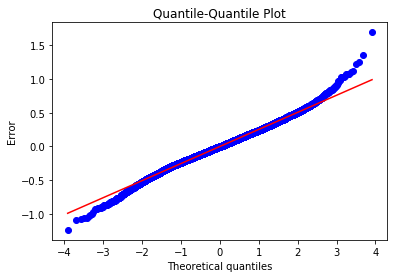

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
ypredicted = linreg.predict(Xtrain)
error = ypredicted - ytrain.as_matrix()
stats.probplot(error, dist='norm', plot=plt)
plt.ylabel('Error')
plt.title('Quantile-Quantile Plot')
plt.show()


Con el gráfico de Quantile-Quantile se busca analizar las diferencias entre la distribución de una población aleatoria y, en este caso, la distribución normal. Se puede apreciar que los valores están distribuidos en el gráfico de manera lineal, en una recta con un coeficiente de correlación de **FIXME**. Esto es suficiente para respaldar la hIpótesis de que los datos están normalmente distribuidos.

#  2.- Selección de Atributos

Utilizando el dataframe de la actividad anterior,

**a)** Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un
modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión
en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al
utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error
de pruebas como función del número de variables en el modelo. Ordene el eje x de menor a mayor.

Para la implementación de FSS, se ha seleccionado el criterio del promedio del valor absoluto dado por:

$\sum_i^N\frac{|Y - \hat{f}(X)|}{N}$

como una forma alternativa para discriminar a los distintos candidatos.

A continuación se presenta el algoritmo y un gráfico entre el número de variables y el error:

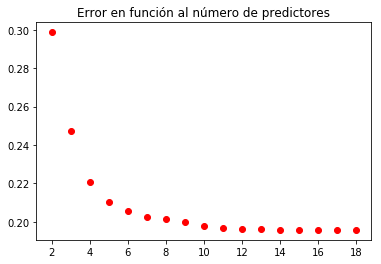

In [13]:
def fss_cuadratic(x, y, names_x, k = 10000):
    p = x.shape[1]-1 #p is the total number of attributes
    k = min(p, k) #k is the maximum number of parameters to choose
    names_x = np.array(names_x) #this is the names of the columns
    remaining = list(range(0, p)) #Amount of comparable attributos left
    selected = [p] #First, choose the last parameter in the list
    current_score = best_new_score = 0.0 #Initialize score
    points = []
    scores = []
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False) #Init a linear regression model
            indexes = selected + [candidate] # Only use the following parameters
            x_train = x.iloc[:, indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2)) # Promedio del valor absoluto
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        points.append(len(selected))
        scores.append(best_new_score)
    return selected, points, scores

def fss_abs(x, y, names_x, k = 10000):
    p = x.shape[1]-1 #p is the total number of attributes
    k = min(p, k) #k is the maximum number of parameters to choose
    names_x = np.array(names_x) #this is the names of the columns
    remaining = list(range(0, p)) #Amount of comparable attributos left
    selected = [p] #First, choose the last parameter in the list
    current_score = best_new_score = 0.0 #Initialize score
    points = []
    scores = []
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False) #Init a linear regression model
            indexes = selected + [candidate] # Only use the following parameters
            x_train = x.iloc[:, indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.absolute(residuals_train)) # Promedio del valor absoluto
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        points.append(len(selected))
        scores.append(best_new_score)
    return selected, points, scores


names_regressors = X.columns[:-1] #without intercept
(selected, points, scores) = fss_abs(X,y,names_regressors)

plt.plot(points, scores, 'ro')
plt.axis()
plt.title('Error en función al número de predictores')
plt.show()

Como se puede apreciar en el gráfico, a medida que aumenta el número de atributos seleccionados, disminuye el error de la predicción hasta que aproximadamente en $p = 12$ la ganancia de precisión ya no es tan significativa. Esto es relevante al momento de seleccionar atributos cuidando de no caer en overfitting, ya que implica que existe un número ideal o óptimo de atributos a seleccionar.

A continuación se presenta una comparación entre la función cuadratica y absoluta para el error:

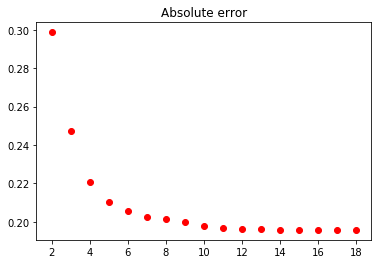

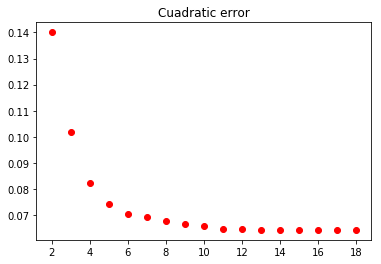

In [14]:


(selected, points, scores) = fss_abs(X,y,names_regressors)

plt.plot(points, scores, 'ro')
plt.axis()
plt.title('Absolute error')
plt.show()

(selected, points, scores) = fss_cuadratic(X,y,names_regressors)

plt.plot(points, scores, 'ro')
plt.axis()
plt.title('Cuadratic error')
plt.show()

Se puede notar claramente que utilizando un criterio de error cuadratico se obtienen errores de menor magnitud debido a la naturaleza de la distancia euclidiana. Sin embargo, se puede también notar que ambos siguen la misma tendencia.

#  3.- Regularización

Utilizando el dataframe de la actividad anterior,

**a)** Ajuste un modelo lineal utilizando “Ridge Regression”, es decir, regularizando con la norma $\ell_2$. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^7, 10^1]$, variando si estima conveniente.
Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización.
Describa lo que observa. (WARNING: Note que la línea 3 y el primer argumento en la línea 9
son críticos).

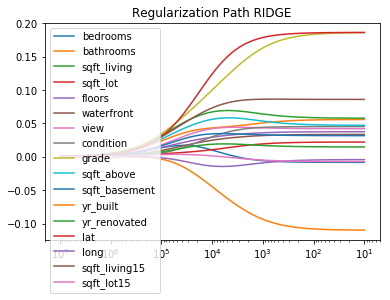

In [15]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Para poder entender el gráfico generado, es necesario entender como funciona Ridge Regression. Este algoritmo penaliza los coeficientes de la regresión lineal a través de un coeficiente denominado $\lambda$. Esto permite "suavizar" la diferencia de valor entre los coeficientes al imponer restricciones sobre su valor máximo.

Cuando se elije un valor de $\lambda$ pequeño, se puede estar en presencia de **underfitting**, mientras que si es muy pequeño se sufre de **overfitting**. Por tanto, es importante elegir valores de $\lambda$ adecuados.

Se puede observar en el gráfico que valores de $\lambda$ cercanos a 0 (o bien, cercanos a $10^1$) generan coeficientes muy dispersos con alta varianza y bias. A medida que se aumenta el valor de $\lambda$ los valores de los coeficientes van disminuyendo proporcionalmente de forma que se genera una disminución en la varianza y el bias. Alrededor de un coeficiente de $10^6$, se tiene que los coeficientes comienzan a ser muy similares entre sí mismos, produciendo el efecto de **overtfitting** que disminuye la capacidad de generalización del modelo entrenado.

Se puede confirmar además que los atributos relevantes corresponden a **sqft_lot** (Metros cuadrados de la vivienda), **grade** y **bathrooms**, debido a que son los que más aportan a la varianza.

**b)** Ajuste un modelo lineal utilizando el método “Lasso”, es decir, regularizando con la norma $\ell_1$. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^0, 10^{-3}]$. Para obtener el código, modifique
las líneas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos
como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?

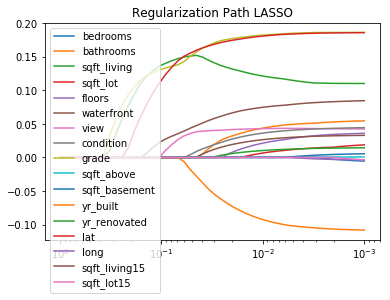

In [16]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

A diferencia de Ride Regression, Lasso permite anular coeficientes para cierto valores de $\lambda$. A esto se le denomina "soft thresholding". Se puede observar que para coeficientes de $\lambda$ pequeños se tiene una gran varianza entre los coeficientes de la regresión lineal. A medida que se aumenta $\lambda$, comienza a disminuir la la varianza entre los coeficientes, pero también la gran mayorìa de ellos comienza a desaparecer. Esto permite reducir la cantidad de atributos requeridos para realizar la estimación, disminuyendo las probabilidades de overfitting si se selecciona un valor de $\lambda$ adecuado.

**c)** Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un
gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de
regularización. Discuta lo que observa.

Se utiliza Lasso para aprovechar la oportunidad de reducir ciertos coeficientes a 0 (los que están más cerca del valor $\lambda = 10^{-3}$) en lugar del suavizado que realiza Ridge Regression.

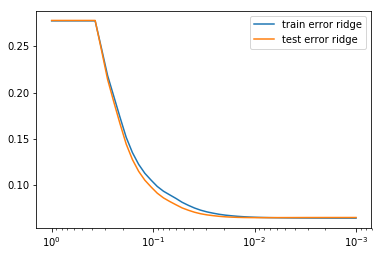

In [17]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Se puede notar que a medida que se disminuye el valor del parámetro $\lambda$, comienzan a aumentar tanto el error de entrenamiento como el error de prueba. Esto ocurre debido a que en Lasso muchos de los coeficientes se anulan, evitando que sus atributos asociados aporten información a la predicción. Entre $10^0$ y $10^{-1}$ se llega a un punto crítico en donde se obtiene un error máximo debido a la elminicación de la mayoría de los atributos.

**d)** Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de
la técnica validación cruzada.

Utilizando Lasso, se tiene que:

In [18]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_ = np.logspace(0,-3,base=10)
model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.248552
BEST PARAMETER=0.281177, MSE(CV)=0.218688
BEST PARAMETER=0.244205, MSE(CV)=0.196162
BEST PARAMETER=0.212095, MSE(CV)=0.173554
BEST PARAMETER=0.184207, MSE(CV)=0.151799
BEST PARAMETER=0.159986, MSE(CV)=0.135389
BEST PARAMETER=0.138950, MSE(CV)=0.122715
BEST PARAMETER=0.120679, MSE(CV)=0.113007
BEST PARAMETER=0.104811, MSE(CV)=0.105611
BEST PARAMETER=0.091030, MSE(CV)=0.098822
BEST PARAMETER=0.079060, MSE(CV)=0.093648
BEST PARAMETER=0.068665, MSE(CV)=0.089745
BEST PARAMETER=0.059636, MSE(CV)=0.085907
BEST PARAMETER=0.051795, MSE(CV)=0.081724
BEST PARAMETER=0.044984, MSE(CV)=0.078441
BEST PARAMETER=0.039069, MSE(CV)=0.075561
BEST PARAMETER=0.033932, MSE(CV)=0.073192
BEST PARAMETER=0.029471, MSE(CV)=0.071383
BEST PARAMETER=0.025595, MSE(CV)=0.069968
BEST PARAMETER=0.022230, MSE(CV)=0.068753
BEST PARAMETER=0.019307, MSE(CV)=0.067832
BEST PARAMETER=0.016768, MSE(CV)=0.067134
BEST PARAMETER=0.014563, MSE(CV)=0

Por lo tanto, el parámetro ideal para Lasso corresponde a $10^{-3}$ que corresponde al intercepto entre el error de entrenamiento y el error de testing de menor valor, coincidiendo con el gráfico anterior.

# 4.- Drift

En esta sección se presentarán dos muestras del dataframe utilizado en la actividades anteriores, donde cada
una de estas tiene una propiedad distinta ya que son muestreadas en función del valor a predecir (logaritmo
del precio de la casa). Por una parte se tiene una pequeña muestra A, la cual es extraída directamente de
los datos con los que se trabaja (manteniendo la distribución de esta) y la muestra B, es generada con el
propósito de que en cada intervalo del rango de valores haya la misma cantidad de datos aproximadamente
(simulando una distribución uniforme). El objetivo es familiarizarse con el concepto de Transfer Learning.

En el siguiente código se generan las dos muestras con las que se trabajará.

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

**a)** Cree el conjunto de entrenamiento y otro de validación para trabajar cada muestra mediante la técnica
de hold out validation.

In [20]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

**b)** Evalúe los dos modelo de regresión lineal que se generan al entrenar con cada muestra. Mida el error
de cada modelo sobre ambos conjuntos de validación (A y B). Explique lo que observa.

In [21]:
lm_A = linear_model.LinearRegression(fit_intercept=False)
model_A = lm_A.fit(Xtrain_A, ytrain_A)
predictions_A = model_A.predict(Xval_A)

lm_B = linear_model.LinearRegression(fit_intercept=False)
model_B = lm_B.fit(Xtrain_B, ytrain_B)
predictions_B = model_B.predict(Xval_B)

# print(predictions_A, predictions_B)

print("Score_A_A:", model_A.score(Xval_A, yval_A))
print("Score_A_B:", model_A.score(Xval_B, yval_B))
print("Score_B_B:", model_B.score(Xval_B, yval_B))
print("Score_B_A:", model_B.score(Xval_A, yval_A))

Score_A_A: -526.211264682
Score_A_B: -184.030775241
Score_B_B: -124.685102287
Score_B_A: -572.830161937


Se puede observar por simple inspección que el score de ambos modelos para el conjunto A es mayor que para el conjunto B

**c)** Si tuviera que elegir uno de los dos modelos anteriores para trabajar con data futura, ¿Cuál eligiría y
por qué?

Basado netamente en los scores obtenidos, el modelo B tendría mejores resultados, tanto para el conjunto A como el conjunto B

# 5.- Detectar enfermedades cardiacas

En el área de la salud, diagnosticar a una persona de una enfermedad de forma rápida y correcta puede llegar a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el medico se llegase a equivocar, aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer
errores.
Pongámonos en el contexto de que usted es contratado para generar un modelo que prediga si es que un paciente presenta una enfermedad cardiaca a partir de ciertos indicadores, tales como la edad, sexo, presión sanguínea, nivel de glicemia, etc.

Como ayuda se le indica que la variable de máximo ritmo cardíaco alcanzado (maximum heart rate achieved) es un buen indicador de detección de enfermedades cardíacas. Por lo que el objetivo es predecir el comportamiento de esta variable en función de las otras, y con esto detectar qué tan distante es el valor real al valor predecido para así luego detectar los posibles outliers (enfermos), que en sí corresponden a pacientes que tienen un comportamiento anormal al resto.

**a)** Lea el archivo de datos, cárguelos en un dataframe o matriz, luego divida el dataframe en dos, un
dataframe de entrenamiento (70% Datos) y un dataframe de prueba (30% Datos).

In [22]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart','angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv('heart.csv', header=None, names=headers, sep=',')

y = df['max_heart']
# train_n = int(len(df)*0.7)
# X_train, X_test = df[-train_n:], df[:-train_n] 
# y_train, y_test = y[-train_n:], y[:-train_n] 

X_train, X_test, y_train, y_test = train_test_split(df[headers], y, test_size=0.3, random_state=42)

X_train_normal = X_train['normal']
X_train_heart = X_train['max_heart']
X_train.drop(['max_heart','normal'],axis=1,inplace=True)

X_test_normal = X_test['normal']
X_test_heart = X_test['max_heart']
X_test.drop(['max_heart','normal'],axis=1,inplace=True)

X_train

,age,sex,chest_pain,blood_p,serum,blood_s,electro,angina,oldpeak,slope,vessel,thal
84,57.0,1.0,4.0,110.0,201.0,0.0,0.0,1.0,1.5,2.0,0.0,6.0
251,44.0,1.0,2.0,130.0,219.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0
92,54.0,1.0,4.0,124.0,266.0,0.0,2.0,1.0,2.2,2.0,1.0,7.0
201,58.0,1.0,4.0,125.0,300.0,0.0,2.0,0.0,0.0,1.0,2.0,7.0
126,62.0,1.0,4.0,120.0,267.0,0.0,0.0,1.0,1.8,2.0,2.0,7.0
124,54.0,1.0,3.0,125.0,273.0,0.0,2.0,0.0,0.5,3.0,1.0,3.0
78,42.0,0.0,3.0,120.0,209.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
181,56.0,0.0,4.0,134.0,409.0,0.0,2.0,1.0,1.9,2.0,2.0,7.0
111,41.0,1.0,2.0,110.0,235.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
229,52.0,1.0,1.0,118.0,186.0,0.0,2.0,0.0,0.0,2.0,0.0,6.0


**b)** Realice una regresión lineal y defina usted una frontera de decisión (umbral) para poder determinar si
es que estamos en presencia o no de una enfermedad cardíaca. Mida su desempeño con ambos conjuntos
de datos.

In [23]:
from sklearn.metrics import accuracy_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train_heart.values.reshape(-1, 1), X_train_normal)
y_mean = y_train.mean()

predictions = model.predict(X_train)

compare = pd.DataFrame({'Y': y_train,'y_': predictions})

compare['R_1'] = compare.apply(lambda x: (x.Y-x.y_)**2, axis=1)
compare['R_2'] = compare.apply(lambda x: (x.Y**2 + x.y_**2)**(1/2), axis=1)
compare['R_3'] = compare.apply(lambda x: (x.Y-y_mean)**2, axis=1)
compare['R_4'] = compare.apply(lambda x: (x.Y**2 + y_mean**2)**(1/2), axis=1)

compare['n_1_2'] = compare.apply(lambda x: (1 if x.R_1 >= x.R_2 else 2), axis=1)
compare['n_2_4'] = compare.apply(lambda x: (1 if x.R_2 >= x.R_4 else 2), axis=1)
compare['n_3_4'] = compare.apply(lambda x: (1 if x.R_3 >= x.R_4 else 2), axis=1)

compare['n_5'] = model2.predict(compare['y_'].values.reshape(-1, 1)).round(0)

print("Train data:")
print("\t - Score n_1_2:  %f"%(accuracy_score(X_train_normal,compare['n_1_2'])))
print("\t - Score n_2_4:  %f"%(accuracy_score(X_train_normal,compare['n_2_4'])))
print("\t - Score n_3_4:  %f"%(accuracy_score(X_train_normal,compare['n_3_4'])))
print("\t - Score n_5:    %f"%(accuracy_score(X_train_normal,compare['n_5'])))
print("\n")

predictions = model.predict(X_test)

compare = pd.DataFrame({'Y': y_test,'y_': predictions})

compare['R_1'] = compare.apply(lambda x: (x.Y-x.y_)**2, axis=1)
compare['R_2'] = compare.apply(lambda x: (x.Y**2 + x.y_**2)**(1/2), axis=1)
compare['R_3'] = compare.apply(lambda x: (x.Y-y_mean)**2, axis=1)
compare['R_4'] = compare.apply(lambda x: (x.Y**2 + y_mean**2)**(1/2), axis=1)

compare['n_1_2'] = compare.apply(lambda x: (1 if x.R_1 >= x.R_2 else 2), axis=1)
compare['n_2_4'] = compare.apply(lambda x: (1 if x.R_2 >= x.R_4 else 2), axis=1)
compare['n_3_4'] = compare.apply(lambda x: (1 if x.R_3 >= x.R_4 else 2), axis=1)

compare['n_5'] = model2.predict(compare['y_'].values.reshape(-1, 1)).round(0)

print("Test data:")
print("\t - Score n_1_2:  %f"%(accuracy_score(X_test_normal,compare['n_1_2'])))
print("\t - Score n_2_4:  %f"%(accuracy_score(X_test_normal,compare['n_2_4'])))
print("\t - Score n_3_4:  %f"%(accuracy_score(X_test_normal,compare['n_3_4'])))
print("\t - Score n_5:    %f"%(accuracy_score(X_test_normal,compare['n_5'])))
print("\n")

Train data:
	 - Score n_1_2:  0.343915
	 - Score n_2_4:  0.788360
	 - Score n_3_4:  0.428571
	 - Score n_5:    0.793651


Test data:
	 - Score n_1_2:  0.469136
	 - Score n_2_4:  0.740741
	 - Score n_3_4:  0.580247
	 - Score n_5:    0.728395




Se calculan 4 $R$s distintos:

$R_1$: Distancia euclidiana entre $Y$ e $\hat{Y}$ 

$R_2$: Norma de $Y$ e $\hat{Y}$ 

$R_3$: Distancia euclidiana entre $Y$ e $\bar{Y}$ 

$R_4$: Norma de $Y$ e $\bar{Y}$ 


Luego estos $R$s son usados para compararlos entre si y obtener un resultado para "normal", donde la predicción de $n_{i,j}$ es 1 si $R_i >= R_j$ y 2 en el caso contrario.

Y además se calculó $n_5$ donde "normal" fue lo predicho por el modelo "model2", el cual fue entrenado utilizando "max_heart" de los datos de prueba para estimar "normal".

Finalmente se puede concluir que $n_{2,4}$ tuvo los mejores resultados tanto en los datos de prueba como en los de entrenamiento.